## 0. Import Lib. & Datasets

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/python/Rolling in the deep/train.csv')

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/python/Rolling in the deep/test.csv')

In [ ]:
data_train.shape

(26457, 20)

In [ ]:
data_test.shape

(10000, 19)

In [ ]:
data_train.tail()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0
26456,26456,F,N,N,0,81000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19569,-1013,1,0,0,0,Security staff,2.0,-9.0,2.0


In [ ]:
data_train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [ ]:
for i in data_train.columns:
  print(data_train[i].dtypes)

int64
object
object
object
int64
float64
object
object
object
object
int64
int64
int64
int64
int64
int64
object
float64
float64
float64


## 1. EDA

### 1.0. Target feature

 - 비율 불균형

In [ ]:
data_train['credit'].describe()

count    26457.000000
mean         1.519560
std          0.702283
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: credit, dtype: float64

In [ ]:
data_train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [ ]:
data_train['credit'].isnull().sum()

0

### 1.1. Gender

In [ ]:
data_train['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

In [ ]:
data_train['gender'].isnull().sum()

0

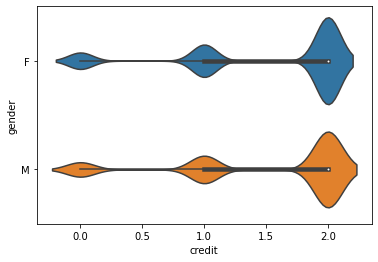

In [ ]:
sns.violinplot(x= 'credit', y = 'gender', data = data_train)

### 2. car

In [ ]:
data_train['car'].value_counts()

N    16410
Y    10047
Name: car, dtype: int64

In [ ]:
data_train['car'].isnull().sum()

0

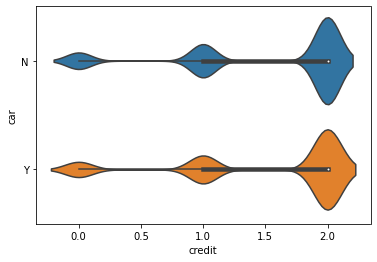

In [ ]:
sns.violinplot(x= 'credit', y = 'car', data = data_train)

### 3. reality

In [ ]:
data_train['reality'].value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

In [ ]:
data_train['reality'].isnull().sum()

0

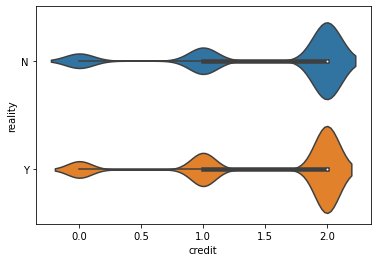

In [ ]:
sns.violinplot(x= 'credit', y = 'reality', data = data_train)

### 4. child_num

In [ ]:
data_train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [ ]:
data_train['child_num'].isnull().sum()

0

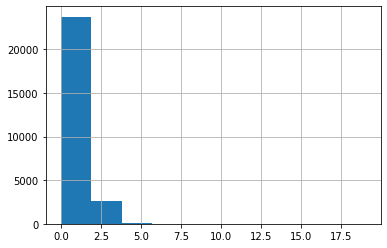

In [ ]:
data_train['child_num'].hist()

### 5. income_total

In [ ]:
data_train['income_total'].describe()

count    2.645700e+04
mean     1.873065e+05
std      1.018784e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

In [ ]:
data_train['income_total'].isnull().sum()

0

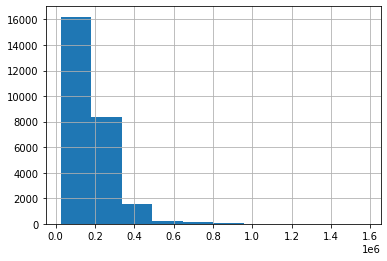

In [ ]:
data_train['income_total'].hist()

### 6. income_type

In [ ]:
data_train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
data_train['income_type'].isnull().sum()

0

### 7. edu_type

In [ ]:
data_train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [ ]:
data_train['edu_type'].isnull().sum()

0

### 8. family_type

In [ ]:
data_train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
data_train['family_type'].isnull().sum()

0

### 9. house_type

In [ ]:
data_train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [ ]:
data_train['house_type'].isnull().sum()

0

### 1.10. DAYS_BIRTH

In [ ]:
data_train['DAYS_BIRTH'].describe()

count    26457.000000
mean    -15958.053899
std       4201.589022
min     -25152.000000
25%     -19431.000000
50%     -15547.000000
75%     -12446.000000
max      -7705.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
data_train['DAYS_BIRTH'].isnull().sum()

0

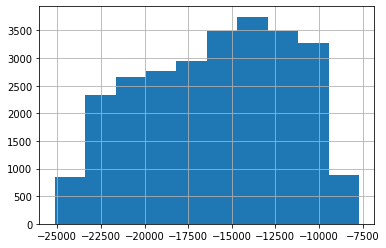

In [ ]:
data_train['DAYS_BIRTH'].hist()

### 1.11. DAYS_EMPLOYED

In [ ]:
data_train['DAYS_EMPLOYED'].describe()

count     26457.000000
mean      59068.750728
std      137475.427503
min      -15713.000000
25%       -3153.000000
50%       -1539.000000
75%        -407.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
data_train['DAYS_EMPLOYED'].isnull().sum()

0

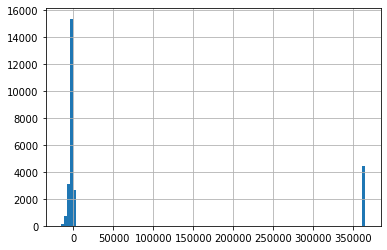

In [ ]:
data_train['DAYS_EMPLOYED'].hist(bins= 100)

### 1.12. FLAG_MOBIL

 - 필요 없는 feature

In [ ]:
data_train['FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

### 1.13. work_phone

In [ ]:
data_train['work_phone'].value_counts()

0    20511
1     5946
Name: work_phone, dtype: int64

### 1.14. phone

In [ ]:
data_train['phone'].value_counts()

0    18672
1     7785
Name: phone, dtype: int64

### 1.15 email

 - work phone, phone과의 상관관계 높으면 삭제 가능

In [ ]:
data_train['email'].value_counts()

0    24042
1     2415
Name: email, dtype: int64

### 1.16. occyp_type

 - 결측치 존재 (제거하기엔 많음)

In [ ]:
data_train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [ ]:
data_train['occyp_type'].isnull().sum()

8171

### 1. 17. family_size

In [ ]:
data_train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
data_train['family_size'].isnull().sum()

0

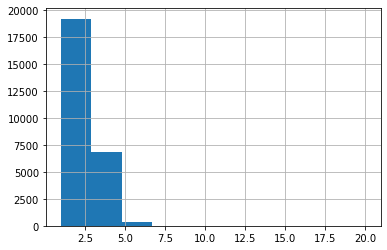

In [ ]:
data_train['family_size'].hist()

### 1.18. begin_month

In [ ]:
data_train['begin_month'].describe()

count    26457.000000
mean       -26.123294
std         16.559550
min        -60.000000
25%        -39.000000
50%        -24.000000
75%        -12.000000
max          0.000000
Name: begin_month, dtype: float64

In [ ]:
data_train['begin_month'].isnull().sum()

0

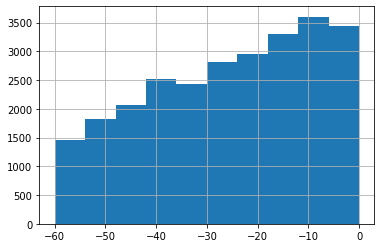

In [ ]:
data_train['begin_month'].hist()